# AI4M Course 1 week 3 lecture notebook

## Explore the data

<img src="mri-slice.png" alt="U-net Image" width="300"/>

In this notebook, we will work with the 3D MRI brain scans from the public [Medical Segmentation Decathlon](https://decathlon-10.grand-challenge.org/) challenge project. This is an incredibly rich dataset that provides you with labels associated with each point (voxel) inside a 3D representation of a patient's brain. Ultimately, in this week's assignment, we will train a neural network to make three-dimensional spatial segmentation predictions for common brain disorders

### Import packages
Packages to help with vizualization will be imported, as well as previously known packages

In [3]:
# Import all the necessary packages
import numpy as np
import nibabel as nib
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

### Loading Images of the brain

In [4]:
# Define the image path and load the data
image_path = "BraTS-Data/imagesTr/BRATS_001.nii.gz"
image_obj = nib.load(image_path)
print(f'Type of the image {type(image_obj)}')

Type of the image <class 'nibabel.nifti1.Nifti1Image'>


### Extract the data as a numpy array
Extract the data using `get_fdata()` method of the image object

In [6]:
# Extract data as a numpy array
image_data = image_obj.get_fdata()
type(image_data)

numpy.ndarray

In [9]:
# Get the image shape and print it out
height, width, depth, channels = image_data.shape
print(f'The image object has the following dimensions: height: {height}, width: {width}, depth: {depth}, channels: {channels}')

The image object has the following dimensions: height: 240, width: 240, depth: 155, channels: 4


These "image objects" are actually 4 dimensional

### Visualize the data
The "depth" listed above indicates that there are 155 layers (slices through the brain) in every image object. The cell below will allow the visualization of a single layer. If the layer is one of the first or the last (`i` is near 0 or 154) there will not be much information and the screen will be dark. Running the cell multiple times will allow the visualization of different layers.
The code is set up to grab a random layer but you can select a specific layer by choosing a value for `i` from 0 to 154. You can also change which channel you're looking at by changing the `channel` value.


Plotting layer 53 Channel 0 of image


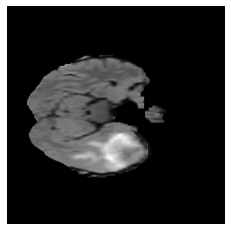

In [11]:
# Select random layer number
maxval = 154
i = np.random.randint(0, maxval)

# Define a channel to look at
channel = 0
print(f'Plotting layer {i} Channel {channel} of image')
plt.imshow(image_data[:, :, i, channel], cmap='gray')
plt.axis('off');

### Intercative exploration
Another way to visualize this dataset is by using IPython Widgets to allow for an interactive exploration of the data.
The next cell allows the exploration across different layers of the data. By moving the slider it's possible to explore different layers. Changing the `channel` value explores different channels.

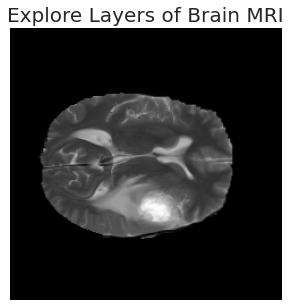

77

In [20]:
# Define a function to visualize the data
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    channel = 3
    plt.imshow(image_data[:, :, layer, channel], cmap='gray');
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage, layer=(0, image_data.shape[2] - 1));

*NOTE*: For some reason the slider isn't active

### Explore the data labels
A new dataset will be read containing the labels for the MRI scan loaded above.

In [22]:
# Define the data path and load the data
label_path = "./BraTS-Data/labelsTr/BRATS_001.nii.gz"
label_obj = nib.load(label_path)
type(label_obj)

nibabel.nifti1.Nifti1Image

### Extract the data as a numpy array
Extract the data labels using the `get_fdata()` method of the image object

In [24]:
# Extract data labels
label_array = label_obj.get_fdata()
type(label_array)

numpy.ndarray

In [25]:
# Extract and print out the shape of the label data
height, width, depth = label_array.shape
print(f'Dimensions of labels data array height: {height}, width: {width}, depth: {depth}')
print(f'With the unique values: {np.unique(label_array)}')
print("""Corresponding to the following label categories:
0: normal
1: for edema
2: for non-enhancing tumor
3: for enhancing tumor
""")

Dimensions of labels data array height: 240, width: 240, depth: 155
With the unique values: [0. 1. 2. 3.]
Corresponding to the following label categories:
0: normal
1: for edema
2: for non-enhancing tumor
3: for enhancing tumor



### Visualize the labels for a specific layer
The next cell will allow visualization of a single layer of the labeled data. The code below is set up to show a single layer and one can set `i` to any value in the [0, 154] range to look at a different layer.
if the chosen layer is near 0 or 154 there might not be much to look at in the images

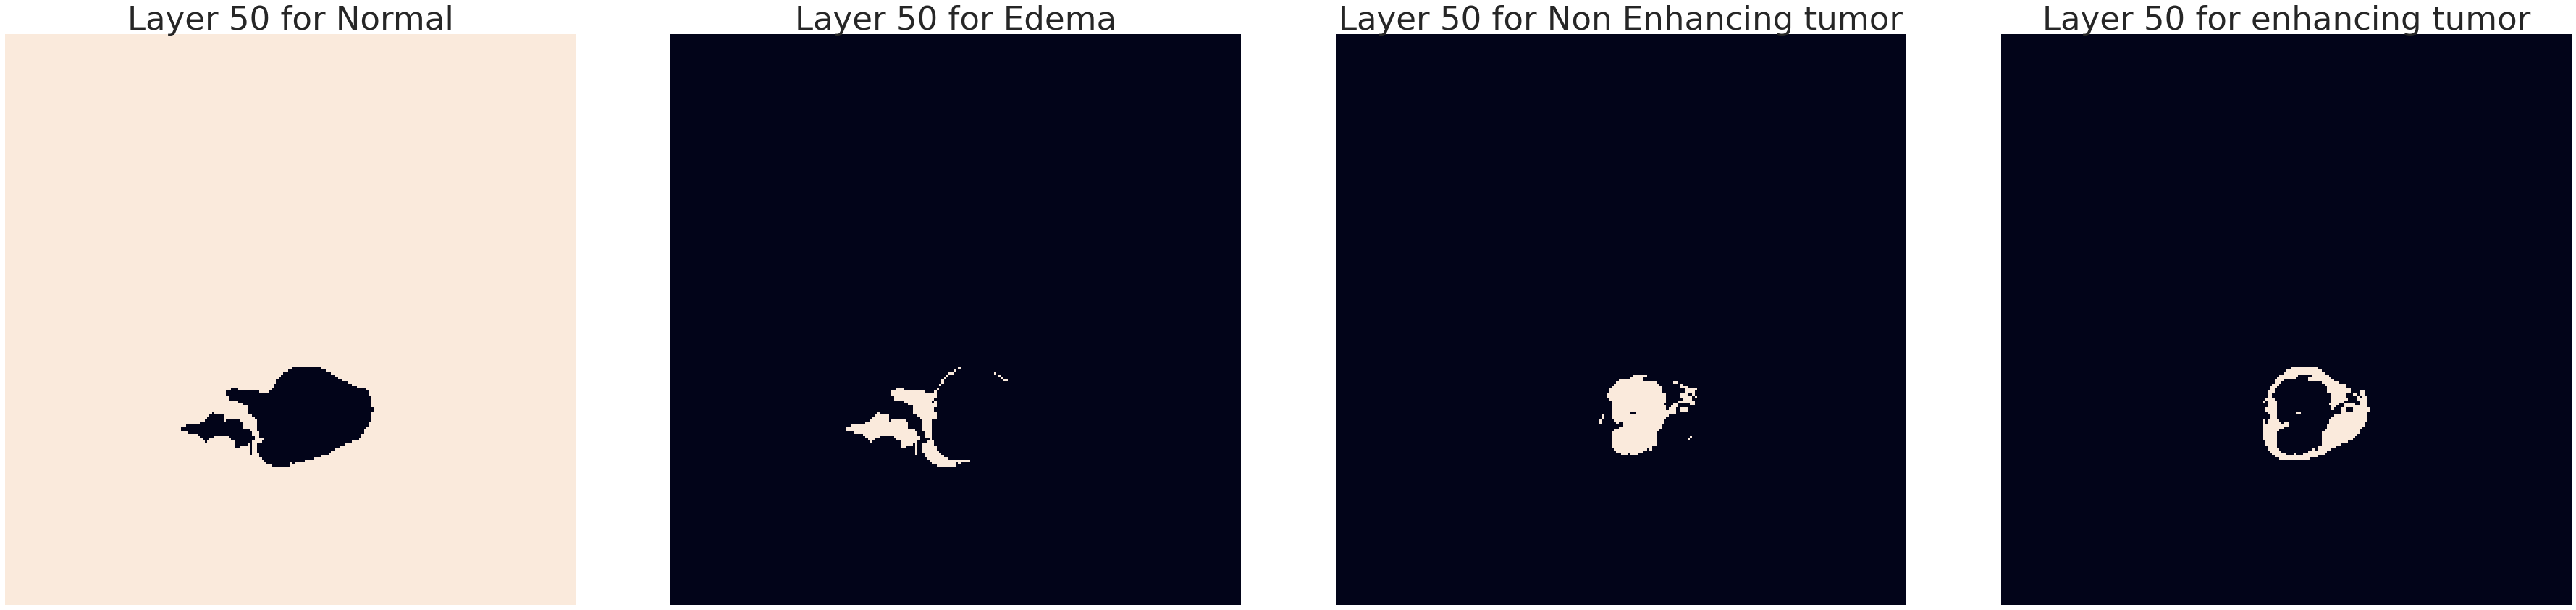

In [27]:
# Define a single layer for ploting
layer = 50

# Define a dictionary of class labels
classes_dict = {
    'Normal': 0.,
    'Edema': 1.,
    'Non Enhancing tumor': 2.,
    'enhancing tumor': 3.
}

# Set up for ploting
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))
for i in range(4):
    img_label_str = list(classes_dict.keys())[i]
    img = label_array[:,:,layer]
    mask = np.where(img == classes_dict[img_label_str], 255, 0)
    ax[i].imshow(mask)
    ax[i].set_title(f'Layer {layer} for {img_label_str}', fontsize=45)
    ax[i].axis('off')
    
plt.tight_layout()

### Interactive visualization across layers

As another way of looking at the data, the code below visualizes where the class can be chosen by clicking a button to choose a particular label an scrolling across layers using the slider

Plotting 0 Layer Label: Normal


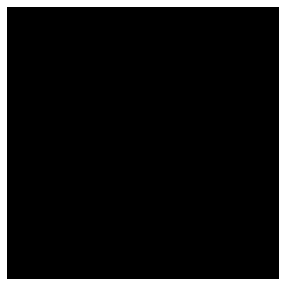

In [30]:
# Create button values
select_class = ToggleButtons(
    options=['Normal','Edema', 'Non-enhancing tumor', 'Enhancing tumor'],
    description='Select Class:',
    disabled=False,
    button_style='info', 
    
)
# Create layer slider
select_layer = IntSlider(min=0, max=154,
                         description='Select Layer',
                         continuous_update=False)

    
# Define a function for plotting images
def plot_image(seg_class, layer):
    print(f"Plotting {layer} Layer Label: {seg_class}")
    img_label = classes_dict[seg_class]
    mask = np.where(label_array[:,:,layer] == img_label, 255, 0)
    plt.figure(figsize=(10,5))
    plt.imshow(mask, cmap='gray')
    plt.axis('off');

# Use the interactive() tool to create the visualization
interactive(plot_image, seg_class=select_class, layer=select_layer)